In [51]:
# imports
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [27]:
# Load file
file = Path('crypto_data.csv')
df = pd.read_csv(file, index_col = 0)
df.head(5)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [28]:
# Discard all currencies that are not being traded and filter currencies that are currently being traded.
new_df = df.loc[df['IsTrading'] == True]
new_df = df.drop(columns=['IsTrading'])
new_df = new_df.dropna()
new_df.head(5)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [29]:
new_df = new_df[new_df.Algorithm.isna() == False]
print(new_df.shape)
new_df.head(5)

(744, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [30]:
# Filter for all currencies that were mined
new_df = new_df.loc[new_df['TotalCoinsMined'] != 0]

In [31]:
# Coin names column is not of use anymore, dropping
new_df = new_df.drop(columns=['CoinName'])
new_df.head(5)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [34]:
# Convert 'TotalCoinSupply' to float
new_df['TotalCoinSupply'] = new_df['TotalCoinSupply'].astype(float)

# Machine learning time :p
X = pd.get_dummies(new_df, columns=["Algorithm", "ProofType"])
X.head(5)

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Data standardization
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(X)
crypto_scaled[0:10]

array([[-0.11416167, -0.15072664, -0.04163054, ..., -0.04163054,
        -0.04163054, -0.04163054],
       [-0.09006124, -0.142553  , -0.04163054, ..., -0.04163054,
        -0.04163054, -0.04163054],
       [ 0.55458069,  4.67601177, -0.04163054, ..., -0.04163054,
        -0.04163054, -0.04163054],
       ...,
       [-0.1137688 , -0.15072664, -0.04163054, ..., -0.04163054,
        -0.04163054, -0.04163054],
       [-0.11157254, -0.1475002 , -0.04163054, ..., -0.04163054,
        -0.04163054, -0.04163054],
       [-0.11399304, -0.150404  , -0.04163054, ..., -0.04163054,
        -0.04163054, -0.04163054]])

In [44]:
# PCA(n_components=0.99) model creation
pca = PCA(n_components=3)
crypto_pca = pca.fit_transform(crypto_scaled)
crypto_pca
pca_df = pd.DataFrame(data=crypto_pca, columns = ["PC_1", "PC_2", "PC_3"], index = new_df.index)
pca_df.head()

,PC_1,PC_2,PC_3
42,-0.335433,1.162446,-0.469110
404,-0.318069,1.162533,-0.469462
1337,2.435512,1.697407,-0.580397
BTC,-0.133077,-1.315462,0.119947
ETH,-0.132978,-2.127965,0.273468


In [45]:
# Further reducing dataset dimensions with TSNE
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(pca_df)

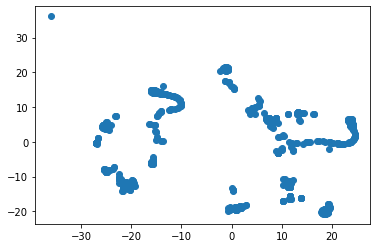

In [50]:
# Data visualization
pca_df['x'] = tsne_features[:, 0]
pca_df['y'] = tsne_features[:, 1]

plt.scatter(pca_df['x'], pca_df['y'])
plt.show()

The TSNE visual results show distinct clusters. 

In [55]:
# Elbow plot and best number of clusters
inertia = []
k = list(range(1, 11))

for i in k:
	kmean = KMeans(n_clusters=i, random_state=0)
	kmean.fit(pca_df)
	inertia.append(kmean.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,241591.710857
1,2,109239.266198
2,3,67778.037653
3,4,39632.850780
4,5,30722.977551


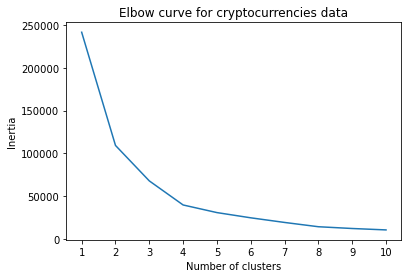

In [56]:
# Plotting elbow curve
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for cryptocurrencies data')
plt.show()

The results from df_elbow and its plot shows there are about 4 clusters, and I would recommend our clients to invest only up to cluster 4.